In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
!pwd

/home/xstefan3/arqmath/compubert


In [346]:
logbase = "train_sampled_eval4"
logfdir = logbase + ".log"

In [138]:
import re
float(re.search(r"Loss\ val\:\ (\d*\.\d*)", "Step 0/630: Loss val: 0.3030857443809509").group(1))

0.3030857443809509

In [352]:
losses = []
cos_sims = []
for line in open(logfdir, "r"):
    loss_match = re.search(r"Loss\ val\:\ (\d*\.\d*)", line)
    cos_match = re.search(r"Objective\ val\:\ (\d*\.\d*)", line)
    if loss_match is not None:
        losses.append(float(loss_match.group(1)))
    if cos_match is not None:
        cos_sims.append(float(cos_match.group(1)))

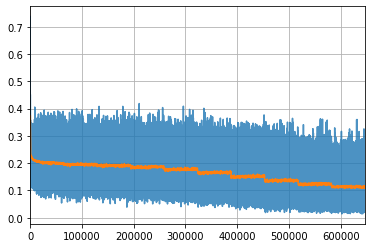

In [353]:
pd.Series(losses).plot(grid=True, alpha=0.8)
pd.Series(losses).rolling(500, win_type='triang').mean().plot(grid=True)

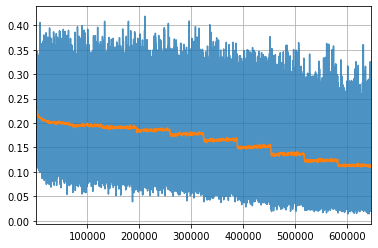

In [354]:
pd.Series(losses).iloc[2000:].plot(grid=True, alpha=0.8)
pd.Series(losses).iloc[2000:].rolling(1000, win_type='triang').mean().plot(grid=True)

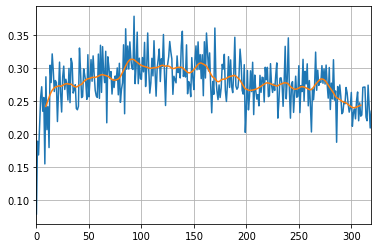

In [355]:
pd.Series(cos_sims).plot(grid=True)
pd.Series(cos_sims).rolling(20, win_type='triang').mean()[10:].reset_index()[0].plot(grid=True)

### Other distance measures and metrics

In [348]:
import os
import numpy as np
from matplotlib.pyplot import xticks
similarities_df = pd.read_csv(os.path.join(logbase, "similarity_evaluation_results.csv"))
similarities_df.columns

Index(['epoch', 'steps', 'cosine_pearson', 'cosine_spearman',
       'euclidean_pearson', 'euclidean_spearman', 'manhattan_pearson',
       'manhattan_spearman', 'dot_pearson', 'dot_spearman'],
      dtype='object')

In [361]:
metrics = ['cosine_pearson', 'cosine_spearman',
       'euclidean_pearson', 'euclidean_spearman', 'manhattan_pearson',
       'manhattan_spearman', 'dot_pearson', 'dot_spearman']


def plot_metric(similarity_eval_df, corr_type):
    spearman_df = similarities_df[[m for m in metrics if corr_type.lower() in m]]
    spearman_smoothed_df = pd.DataFrame()
    spearman_smoothed_df[["Smoothed %s" % c for c in spearman_df.columns]] = \
            spearman_df.apply(lambda c: c.rolling(20, win_type='triang').mean()[10:], axis=0).reset_index(drop=True)
    
    
    
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15,7))
    # smoothed
    ax1 = spearman_smoothed_df.plot(title='%s correlation for selected distance measures' % corr_type, grid=True, figsize=(12, 6))
    # oriinal
    ax2 = spearman_df.plot(grid=True, figsize=(18, 9), alpha=0.8, ax=ax1)
    xticks(range(0, len(similarity_eval_df), 32), ["Epoch %s" % e for e in range(0, len(similarity_eval_df), 1)])
    #                      xticks=["Epoch %s" % int(i)/32 for i in range(0, len(similarity_eval_df), 32)])

<Figure size 1080x504 with 0 Axes>

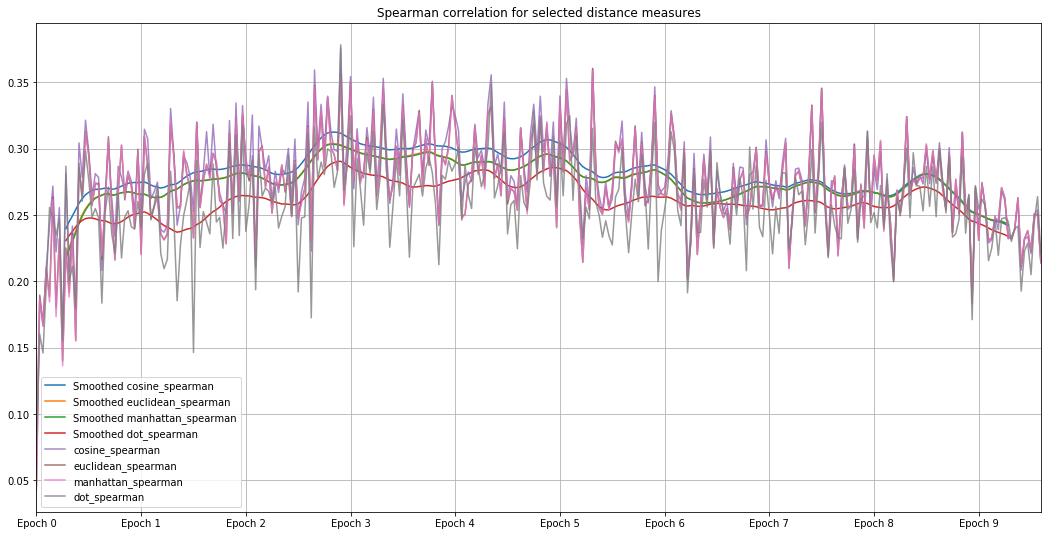

In [362]:
plot_metric(similarities_df, "Spearman")

<Figure size 1080x504 with 0 Axes>

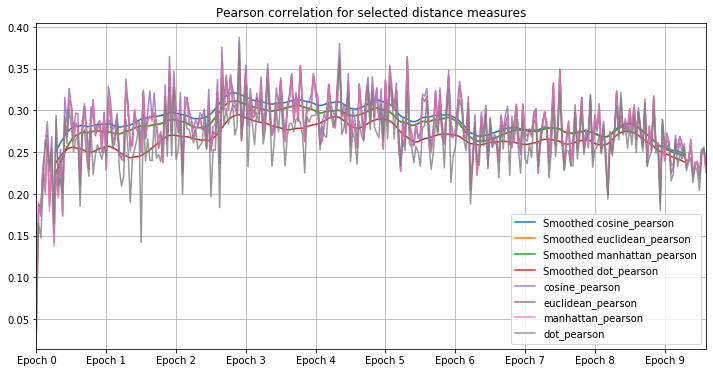

In [358]:
plot_metric(similarities_df, "Pearson")